https://www.udemy.com/course/deeplearning/learn/lecture/6744524#overview 

https://scikit-learn.org/stable/modules/decomposition.html

http://archive.ics.uci.edu/ml/datasets/Statlog+(Australian+Credit+Approval)

# 1. Import library

In [75]:
# Dataframe manipulation
import numpy as np
import pandas as pd
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# 2. Import dataset

In [76]:
# Importing the dataset
df = pd.read_csv('Credit_Card_Applications.csv')

In [77]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.080,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.670,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.580,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.670,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.170,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1


#### remove redundant features

In [78]:
removed_list = ['CustomerID']
selected_list = [var for var in df.columns if var not in removed_list]
df = df[selected_list]

df.shape

(690, 15)

#### View data structure

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  Class   690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


# 3. Data Exploration

### 3.1. Descriptive Statistics

In [80]:
# display various ranges 
pd.options.display.float_format = '{:.3f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,690.000,0.678,0.467,0.000,0.000,1.000,1.000,1.000
A2,690.000,31.568,11.853,13.750,22.670,28.625,37.707,80.250
A3,690.000,4.759,4.978,0.000,1.000,2.750,7.207,28.000
A4,690.000,1.767,0.430,1.000,2.000,2.000,2.000,3.000
A5,690.000,7.372,3.683,1.000,4.000,8.000,10.000,14.000
A6,690.000,4.693,1.992,1.000,4.000,4.000,5.000,9.000
A7,690.000,2.223,3.347,0.000,0.165,1.000,2.625,28.500
A8,690.000,0.523,0.500,0.000,0.000,1.000,1.000,1.000
A9,690.000,0.428,0.495,0.000,0.000,0.000,1.000,1.000
A10,690.000,2.400,4.863,0.000,0.000,0.000,3.000,67.000


### 3.2. Target Analysis

[Text(0, 0.5, '(count)')]

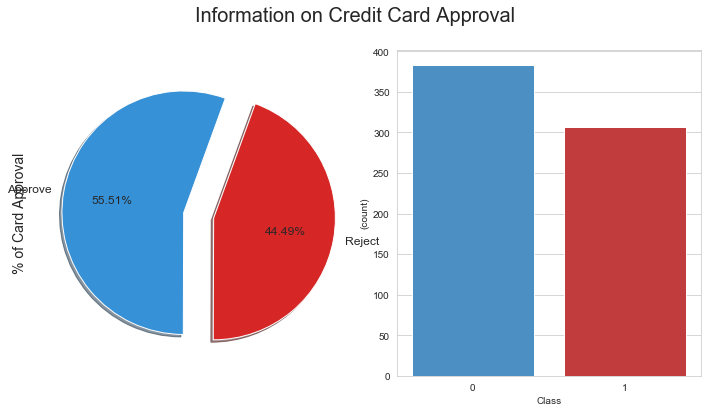

In [81]:
sns.set_style('whitegrid')
f, ax = plt.subplots(1,2,figsize=(12,6))

colors = ['#3791D7','#D72626']
labels = ['Approve', 'Reject']

plt.suptitle('Information on Credit Card Approval', fontsize=20)
df['Class'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%',ax=ax[0],shadow=True, colors=colors,labels=labels,fontsize=12,startangle=70)
ax[0].set_ylabel('% of Card Approval', fontsize=14)

sns.countplot(df['Class'], palette=colors)
ax[1].set(ylabel="(count)")

### 3.3. Investigating missing data

#### Display total count of missing values per column

In [82]:
miss_val_df = pd.DataFrame(df.isnull().sum(),columns=['ColumnName'])
miss_val_df['Percentage'] = 100 * df.isnull().sum()/len(df)
miss_val_df.sort_values('Percentage', ascending=False)

,ColumnName,Percentage
A1,0,0.000
A2,0,0.000
A3,0,0.000
A4,0,0.000
A5,0,0.000
A6,0,0.000
A7,0,0.000
A8,0,0.000
A9,0,0.000
A10,0,0.000


#### Investigate pattern of missing data

In [83]:
c1_df = df.loc[df['Class'] == 1]
print(c1_df.shape)
c0_df = df.loc[df['Class'] == 0]
print(c0_df.shape)

(307, 15)
(383, 15)


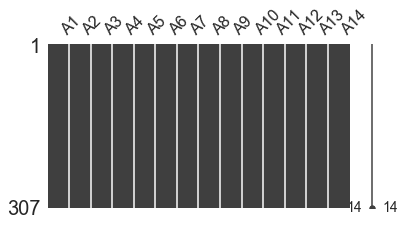

In [84]:
# To analyze the type of missing data
import missingno as msno
msno.matrix(c1_df.drop('Class',axis=1), figsize=(6,3))
plt.show()

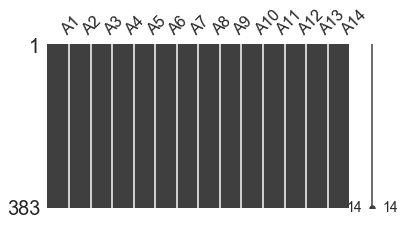

In [85]:
msno.matrix(c0_df.drop('Class',axis=1), figsize=(6,3))
plt.show()

### 3.4. Distribution of numerical features

In [86]:
removed_list = ['Class']
# make a list of the categorical variables that contain missing values
num_vars = [var for var in df.columns if df[var].dtypes!='O' and var not in removed_list]
len(num_vars)

14

### Discrete vars

In [87]:
dis_vars = [var for var in num_vars if len(df[var].unique()) < 20]
print('Number of discrete variables: ', len(dis_vars))
df[dis_vars].head()

Number of discrete variables:  8


,A1,A4,A5,A6,A8,A9,A11,A12
0,1,2,4,4,0,0,1,2
1,0,2,8,4,0,0,0,2
2,0,1,4,4,0,0,1,2
3,0,1,5,3,1,1,1,2
4,1,2,6,4,1,1,0,2


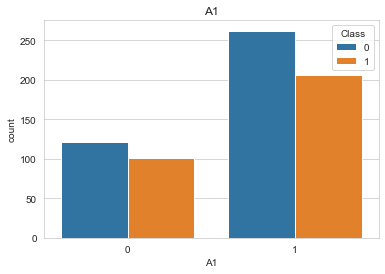

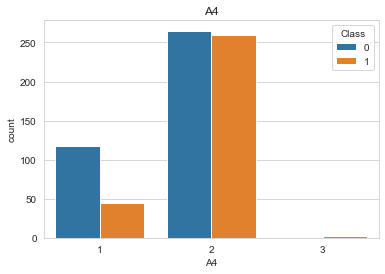

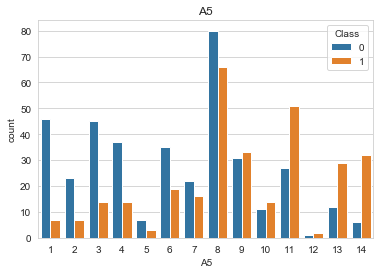

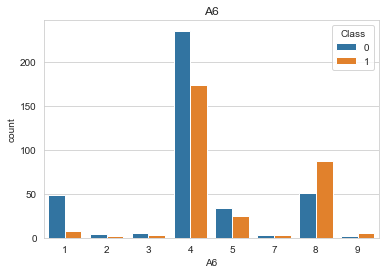

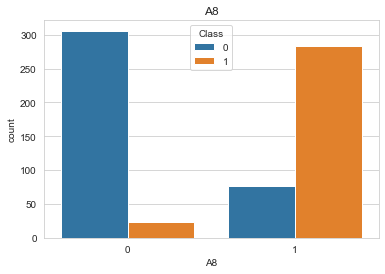

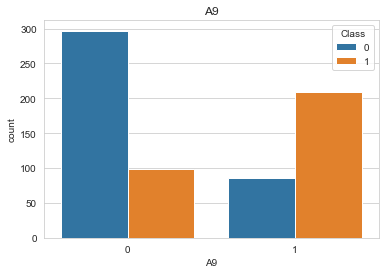

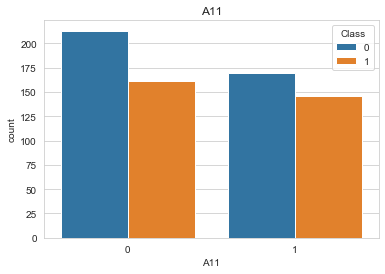

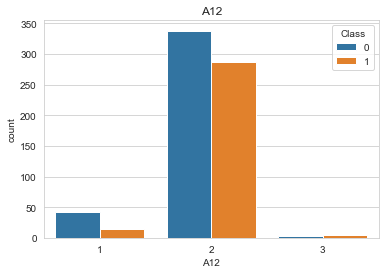

In [88]:
def analyze_na_values(df, var, target):
    df = df.copy()
    
    # Calculate the mean Price where the information is missing or present
    sns.countplot(x=var, data=df, hue=target)
    plt.title(var)
    plt.show()
    
for var in dis_vars:
    analyze_na_values(df, var, 'Class')

### Continous vars

In [89]:
cont_vars= [var for var in num_vars if var not in dis_vars]
print('Number of continous variables: ',len(cont_vars))
df[cont_vars].head()

Number of continous variables:  6


,A2,A3,A7,A10,A13,A14
0,22.080,11.460,1.585,0,100,1213
1,22.670,7.000,0.165,0,160,1
2,29.580,1.750,1.250,0,280,1
3,21.670,11.500,0.000,11,0,1
4,20.170,8.170,1.960,14,60,159


#### Density plot

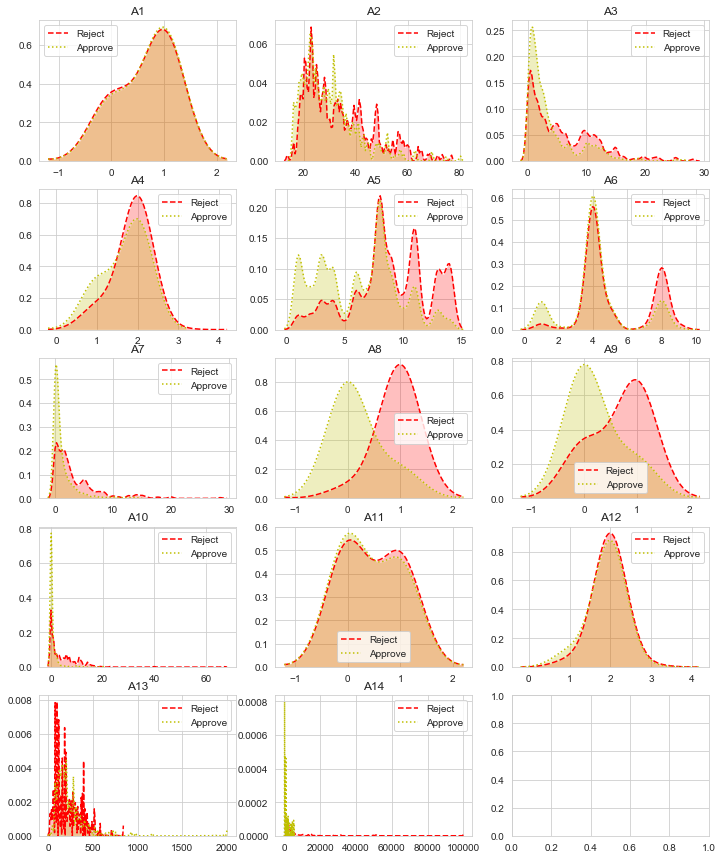

In [90]:
i = 1

fig, ax = plt.subplots(5,3,figsize=(12,15))
for column in numerical_list:    
    plt.subplot(5,3,i)
    sns.kdeplot(c1_df[column], bw = 0.4, label = "Reject", shade=True, color="r", linestyle="--")
    sns.kdeplot(c0_df[column], bw = 0.4, label = "Approve", shade=True, color= "y", linestyle=":")
    plt.title(column, fontsize=12)
    i = i + 1
plt.show();

#### Box plot

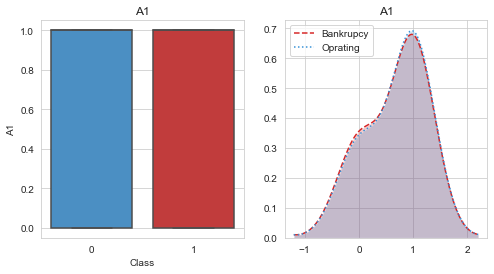

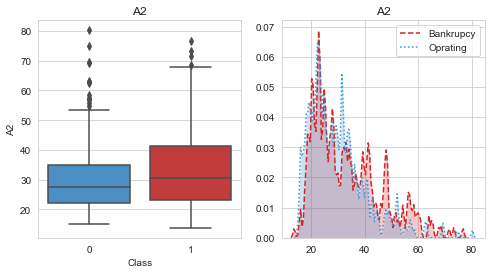

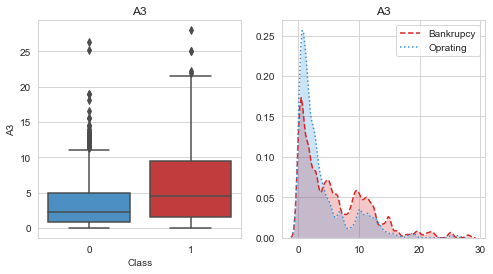

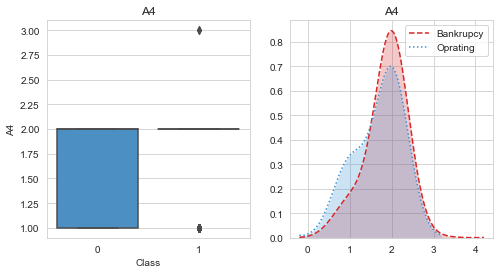

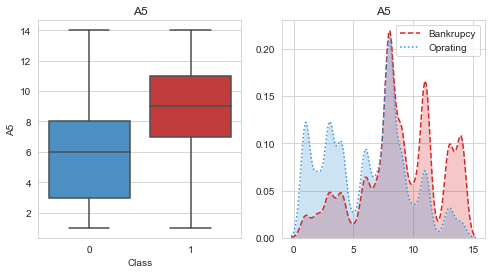

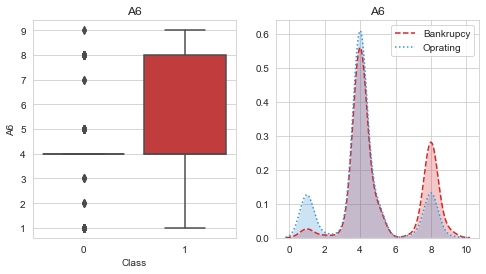

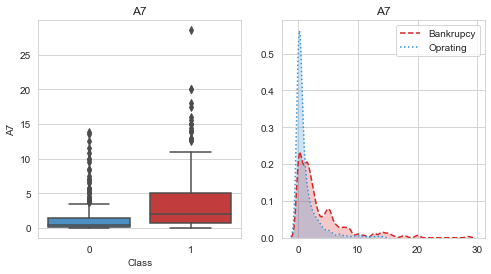

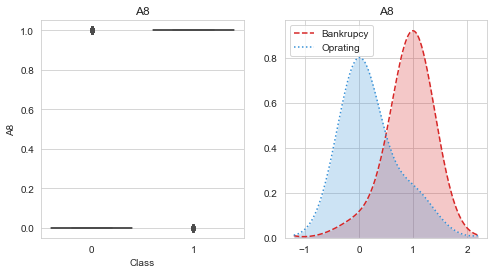

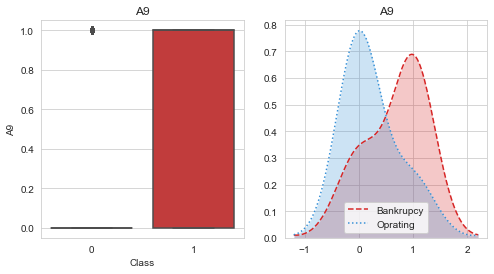

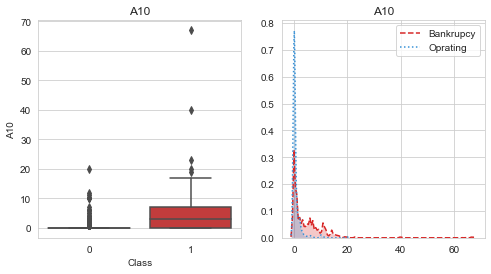

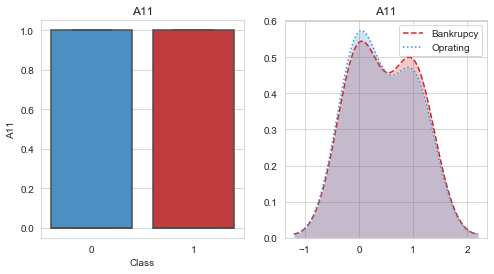

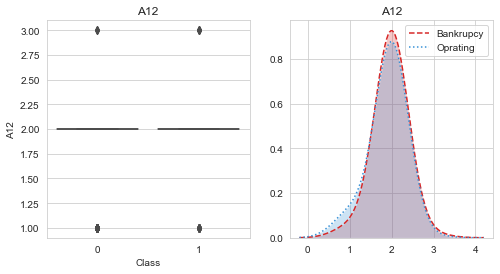

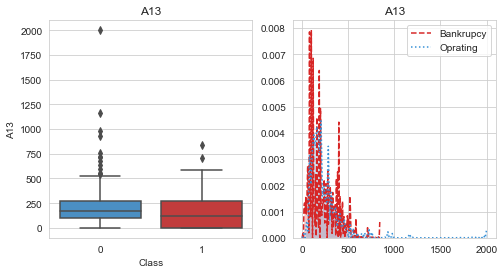

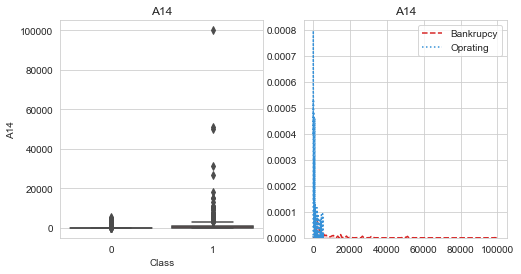

In [91]:
column_headers = df.drop(['Class'],axis=1).columns.values
colors = ['#3791D7','#D72626']

for column_header in column_headers:    
    plt.figure(figsize=[8,4])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column_header,data=df,palette=colors)
    plt.title(column_header, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(c1_df[column_header], bw = 0.4, label = "Bankrupcy", shade=True, color='#D72626', linestyle="--")
    sns.kdeplot(c0_df[column_header], bw = 0.4, label = "Oprating", shade=True, color= '#3791D7', linestyle=":")
    plt.title(column_header, fontsize=12)
    plt.show()

#### Violin plot

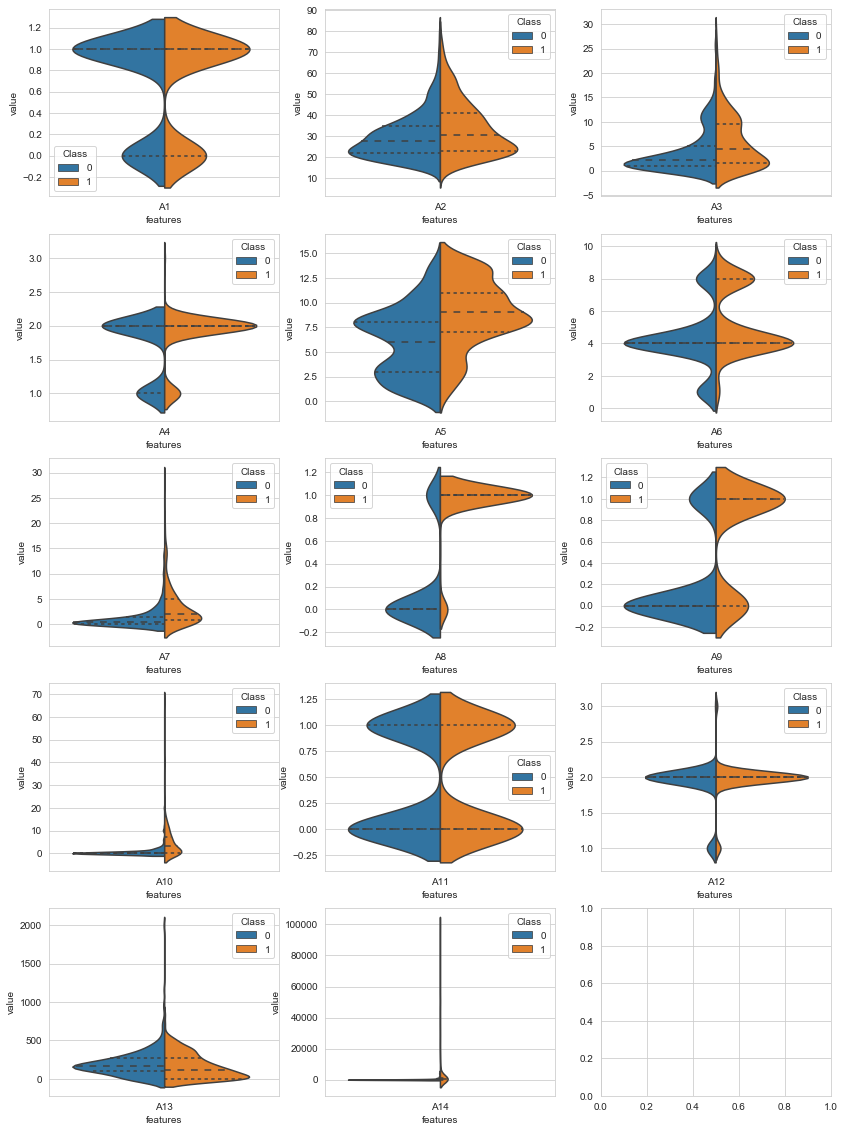

In [92]:
i = 1

fig, ax = plt.subplots(5,3,figsize=(14,20))
for column in numerical_list:    
    plt.subplot(5,3,i)
    data = pd.concat([df['Class'],df[column]],axis=1)
    data = pd.melt(data,id_vars="Class",var_name="features",value_name='value')
    sns.violinplot(x="features", y="value", hue="Class", data=data,split=True, inner="quart")
    i = i + 1
plt.show();

#### Correlation Matrix

In [93]:
corr = df.corr()
corr

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
A1,1.000,0.037,-0.028,-0.064,-0.005,0.053,0.097,0.001,-0.063,-0.008,0.054,-0.060,0.059,0.004,-0.014
A2,0.037,1.000,0.201,0.090,-0.094,0.029,0.393,0.204,0.084,0.186,0.055,0.021,-0.077,0.019,0.162
A3,-0.028,0.201,1.000,0.092,0.028,0.095,0.299,0.244,0.175,0.271,-0.013,0.094,-0.222,0.123,0.206
A4,-0.064,0.090,0.092,1.000,0.089,0.047,0.081,0.130,0.162,0.106,0.005,0.006,-0.002,0.120,0.194
A5,-0.005,-0.094,0.028,0.089,1.000,0.402,0.145,0.312,0.223,0.150,0.025,0.070,0.088,0.031,0.374
A6,0.053,0.029,0.095,0.047,0.402,1.000,0.240,0.246,0.080,0.099,0.094,0.036,0.071,0.065,0.247
A7,0.097,0.393,0.299,0.081,0.145,0.240,1.000,0.346,0.223,0.322,0.138,-0.016,-0.076,0.051,0.322
A8,0.001,0.204,0.244,0.130,0.312,0.246,0.346,1.000,0.432,0.380,0.091,0.045,-0.067,0.090,0.720
A9,-0.063,0.084,0.175,0.162,0.223,0.080,0.223,0.432,1.000,0.571,0.017,0.176,-0.053,0.078,0.458
A10,-0.008,0.186,0.271,0.106,0.150,0.099,0.322,0.380,0.571,1.000,0.007,0.101,-0.120,0.064,0.406


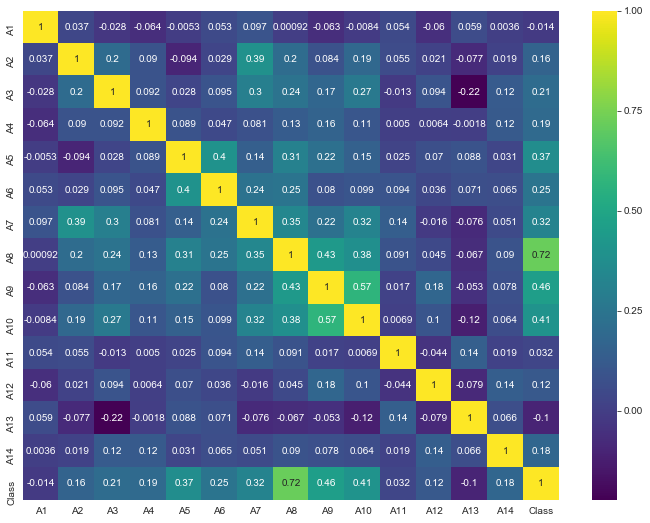

In [94]:
plt.figure(figsize = (12,9))
sns.heatmap(corr, annot = True, cmap='viridis')
plt.show()

#### Create a bar plot showing the correlation of the numeric features to the new loan column

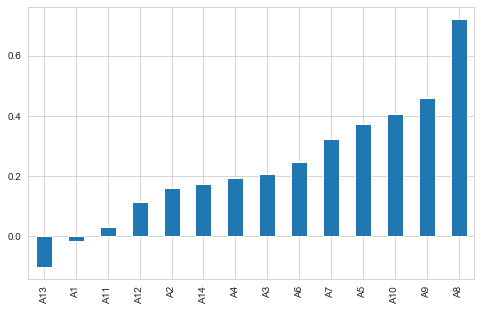

In [95]:
plt.figure(figsize = (8,5))
df.corr()['Class'].sort_values().drop('Class').plot(kind='bar')
plt.show()

# 4. Data Preprocessing

### 4.1. Data Normalization

In [96]:
scaler = MinMaxScaler(feature_range = (0, 1))
df = df.reset_index(drop=True)
selected_features = [var for var in df.columns if var not in ['Class']]

X_scaled = df[selected_features]
X_scaled = pd.DataFrame(scaler.fit_transform(X_scaled))
X_scaled.columns = selected_features
print(X_scaled.shape)
X_scaled.head()

(690, 14)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1.000,0.125,0.409,0.500,0.231,0.375,0.056,0.000,0.000,0.000,1.000,0.500,0.050,0.012
1,0.000,0.134,0.250,0.500,0.538,0.375,0.006,0.000,0.000,0.000,0.000,0.500,0.080,0.000
2,0.000,0.238,0.062,0.000,0.231,0.375,0.044,0.000,0.000,0.000,1.000,0.500,0.140,0.000
3,0.000,0.119,0.411,0.000,0.308,0.250,0.000,1.000,1.000,0.164,1.000,0.500,0.000,0.000
4,1.000,0.097,0.292,0.500,0.385,0.375,0.069,1.000,1.000,0.209,0.000,0.500,0.030,0.002


### 4.2. Splitting data into X & y

In [97]:
X = X_scaled  #independent columns
y = df['Class']    #target column i.e price range

scaled_df = pd.concat([X,y],axis=1)

In [98]:
scaled_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1.000,0.125,0.409,0.500,0.231,0.375,0.056,0.000,0.000,0.000,1.000,0.500,0.050,0.012,0
1,0.000,0.134,0.250,0.500,0.538,0.375,0.006,0.000,0.000,0.000,0.000,0.500,0.080,0.000,0
2,0.000,0.238,0.062,0.000,0.231,0.375,0.044,0.000,0.000,0.000,1.000,0.500,0.140,0.000,0
3,0.000,0.119,0.411,0.000,0.308,0.250,0.000,1.000,1.000,0.164,1.000,0.500,0.000,0.000,1
4,1.000,0.097,0.292,0.500,0.385,0.375,0.069,1.000,1.000,0.209,0.000,0.500,0.030,0.002,1


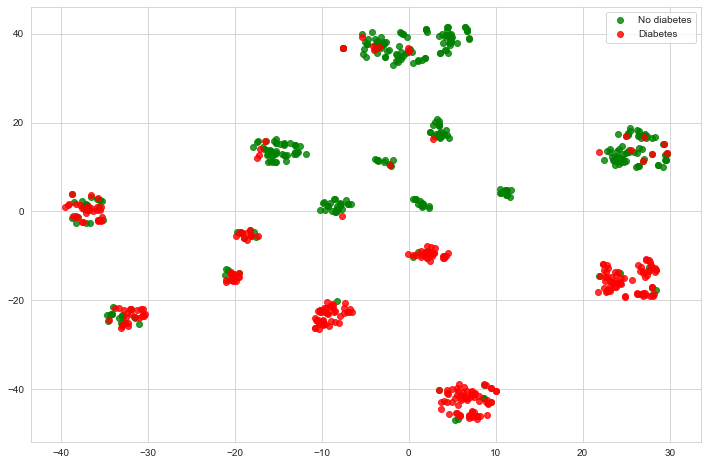

In [99]:
from sklearn.manifold import TSNE


def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='No diabetes')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Diabetes')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, y)

# 5. Feature Selection

In [100]:
from sklearn.ensemble import ExtraTreesClassifier

### dataset 3 feature selection feature 37 has largest missing data 
###using three ways to select the top 10 features
# method one univariate selection cannot be used because has negtive feature
# feature extraction

model = ExtraTreesClassifier()
model.fit(X, y)
array=model.feature_importances_
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=selected_features)


feat_importances.sort_values(ascending=False)[0:20]

A8    0.376
A9    0.108
A5    0.076
A7    0.065
A13   0.060
A2    0.059
A3    0.058
A14   0.045
A6    0.037
A10   0.034
A4    0.025
A12   0.022
A11   0.019
A1    0.017
dtype: float64

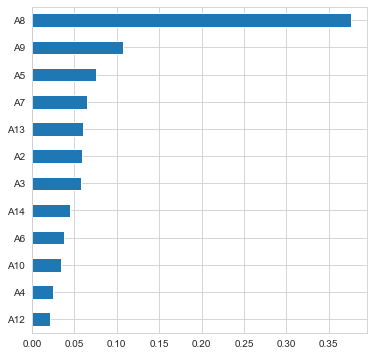

In [101]:
plt.figure(figsize=[6,6])
feat_importances.nlargest(12).sort_values(ascending=True).plot(kind='barh')
plt.show()

# 6. Classification

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

In [56]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(kernel="linear")))
models.append(('LSVC', SVC(kernel="rbf")))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('LGB',LGBMClassifier()))
models.append(('ADA',AdaBoostClassifier()))
models.append(('QDA',QuadraticDiscriminantAnalysis()))
models.append(('NN',MLPClassifier()))
models.append(('XGB',XGBClassifier()))

In [57]:
# Test options and evaluation metric
seed = 9
scoring = 'accuracy'

In [58]:
# evaluate each model in turn
results = {}
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results[name] = cv_results
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.849208 (0.026550)
SVC: 0.853092 (0.052470)
LSVC: 0.851094 (0.038543)
LR: 0.858710 (0.030339)
DT: 0.814404 (0.037415)
GNB: 0.795060 (0.049610)
RF: 0.868552 (0.022047)
GB: 0.864630 (0.029668)
LGB: 0.864630 (0.027169)
ADA: 0.818250 (0.043810)
QDA: 0.797021 (0.052183)
NN: 0.854864 (0.023570)
XGB: 0.868552 (0.030446)


In [59]:
results_df = pd.DataFrame(results)
results_df

,KNN,SVC,LSVC,LR,DT,GNB,RF,GB,LGB,ADA,QDA,NN,XGB
0,0.846,0.827,0.827,0.885,0.808,0.865,0.846,0.865,0.865,0.885,0.885,0.904,0.885
1,0.788,0.827,0.808,0.827,0.827,0.788,0.846,0.827,0.827,0.808,0.750,0.827,0.808
2,0.827,0.769,0.808,0.827,0.769,0.808,0.846,0.808,0.827,0.712,0.788,0.846,0.865
3,0.846,0.942,0.923,0.923,0.846,0.712,0.904,0.904,0.904,0.827,0.692,0.865,0.904
4,0.885,0.885,0.885,0.885,0.769,0.788,0.865,0.885,0.885,0.808,0.808,0.885,0.846
5,0.865,0.865,0.865,0.865,0.769,0.769,0.846,0.846,0.846,0.808,0.769,0.865,0.827
6,0.846,0.808,0.827,0.846,0.865,0.788,0.885,0.904,0.885,0.846,0.827,0.827,0.904
7,0.843,0.922,0.843,0.863,0.843,0.725,0.882,0.863,0.843,0.804,0.784,0.843,0.882
8,0.863,0.804,0.824,0.824,0.784,0.843,0.902,0.863,0.902,0.824,0.804,0.843,0.882
9,0.882,0.882,0.902,0.843,0.863,0.863,0.863,0.882,0.863,0.863,0.863,0.843,0.882


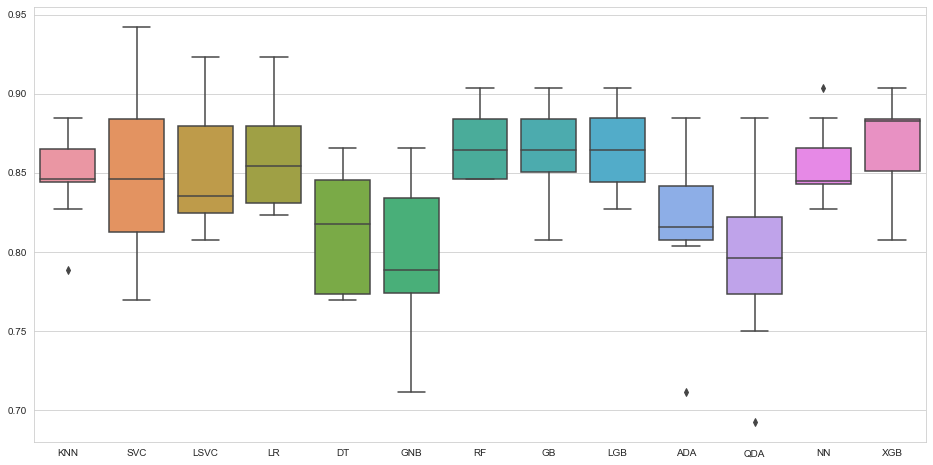

In [60]:
plt.figure(figsize=(16,8))
sns.boxplot(data=results_df)
plt.show()

In [63]:
def ModelEvaluation(models):
    
    for name,model in models:
        print(name)
        model.fit(X_train, y_train)
        
        print('==========================================================')
        print('Train set')
        y_train_pred = model.predict(X_train)
        print('Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_train, list(y_train_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_train,list(y_train_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'Predicted'
        cm_df.columns.name = 'True'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_train, list(y_train_pred)))
  
        print('----------------------------------------------------------')
        print('Test set')
        y_test_pred = model.predict(X_test)
        print('Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_test, list(y_test_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_test,list(y_test_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'Predicted'
        cm_df.columns.name = 'True'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_test, list(y_test_pred)))
        print('==========================================================')
        
ModelEvaluation(models)

KNN
Train set
Accuracy:  0.8858800773694391
ROC AUC Score:  0.8851234661414937
Confusion matrix
True         0    1
Predicted          
0          256   31
1           28  202
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       287
           1       0.87      0.88      0.87       230

    accuracy                           0.89       517
   macro avg       0.88      0.89      0.88       517
weighted avg       0.89      0.89      0.89       517

----------------------------------------------------------
Test set
Accuracy:  0.838150289017341
ROC AUC Score:  0.8323187229437229
Confusion matrix
True        0   1
Predicted        
0          85  11
1          17  60
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        96
           1       0.85      0.78      0.81        77

    accuracy                           0.84       173
   macro avg       0.84      0.83      0.83       173
weig

Train set
Accuracy:  0.9110251450676983
ROC AUC Score:  0.9116573246477807
Confusion matrix
True         0    1
Predicted          
0          260   27
1           19  211
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       287
           1       0.89      0.92      0.90       230

    accuracy                           0.91       517
   macro avg       0.91      0.91      0.91       517
weighted avg       0.91      0.91      0.91       517

----------------------------------------------------------
Test set
Accuracy:  0.861271676300578
ROC AUC Score:  0.8557224025974026
Confusion matrix
True        0   1
Predicted        
0          87   9
1          15  62
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        96
           1       0.87      0.81      0.84        77

    accuracy                           0.86       173
   macro avg       0.86      0.86      0.86       173
weighted